In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [5]:
data1=pd.read_csv("D:\Python\Project\Dec2021.csv",encoding='latin-1')
D1=data1.iloc[3:]
D1=D1.T
D1.columns=D1.iloc[0]
D1.index=D1['Sl.No.']
D1.columns=D1.iloc[1]
D1=D1[2:]
col_to_keep=['Schedules','Fleet Held','Fleet Utilisation (%)','% off road  vehicles','Schedule kms (in lakh)', 'Effective Kilometers (in lakh)']
D1.drop(columns=[col for col in D1.columns if col not in col_to_keep],inplace=True)
D1.head()
D1.count()

Factor
Schedules                         17
Fleet Held                        17
Fleet Utilisation (%)             17
% off road  vehicles              17
Schedule kms (in lakh)            17
Effective Kilometers (in lakh)    17
dtype: int64

In [6]:
D1=D1[:17]
D1
#adding a new column as city id
D1['City_Id'] = range(1, len(D1) + 1)
D1.columns
#remove empty rows
D1.dropna(inplace=True)
D1

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id
Sl.No.,,,,,,,
BNG©,589,743,69,5.4,63.9,69.84,1
RMN,471,498,80.2,7.2,38.99,41.45,2
TMK,572,620,87.3,5.2,59.89,56.68,3
KLR,512,539,87.8,3.7,46.71,50.48,4
CBP,521,564,91,4.1,52.52,56.07,5
MYS(U),364,431,79.7,4.6,22.49,21.99,6
MYS(R),617,688,79.6,5.5,66.12,67.33,7
MDY,416,447,83.7,6.4,39.24,40.88,8
CJR,463,509,87.8,5.5,46.44,47.27,9


In [7]:
D1.columns

Index(['Schedules', 'Fleet Held', 'Fleet Utilisation (%)',
       '% off road  vehicles', 'Schedule kms (in lakh)',
       'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Factor')

In [8]:
#Effective passenger density
#effPassDensity=(('Fleet Utilisation(%)')*0.01)*('Fleet Held')

FleetUtilisation=D1['Fleet Utilisation (%)']

FleetHeldArray=D1['Fleet Held']
FleetHeldArray=FleetHeldArray.astype('float64')
FleetUtilisation=FleetUtilisation.astype('float64')
FleetUtilisation=FleetUtilisation*0.01
EffPassDensity=np.multiply(FleetUtilisation,FleetHeldArray)
D1['EffPassDensity']=EffPassDensity
D1


Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Sl.No.,,,,,,,,
BNG©,589,743,69,5.4,63.9,69.84,1,512.670
RMN,471,498,80.2,7.2,38.99,41.45,2,399.396
TMK,572,620,87.3,5.2,59.89,56.68,3,541.260
KLR,512,539,87.8,3.7,46.71,50.48,4,473.242
CBP,521,564,91,4.1,52.52,56.07,5,513.240
MYS(U),364,431,79.7,4.6,22.49,21.99,6,343.507
MYS(R),617,688,79.6,5.5,66.12,67.33,7,547.648
MDY,416,447,83.7,6.4,39.24,40.88,8,374.139
CJR,463,509,87.8,5.5,46.44,47.27,9,446.902


In [9]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, BNG© to CDG
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Schedules                       16 non-null     object 
 1   Fleet Held                      16 non-null     object 
 2   Fleet Utilisation (%)           16 non-null     object 
 3   % off road  vehicles            16 non-null     object 
 4   Schedule kms (in lakh)          16 non-null     object 
 5   Effective Kilometers (in lakh)  16 non-null     object 
 6   City_Id                         16 non-null     int64  
 7   EffPassDensity                  16 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ KB


In [10]:
D1.head()

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Sl.No.,,,,,,,,
BNG©,589,743,69,5.4,63.9,69.84,1,512.670
RMN,471,498,80.2,7.2,38.99,41.45,2,399.396
TMK,572,620,87.3,5.2,59.89,56.68,3,541.260
KLR,512,539,87.8,3.7,46.71,50.48,4,473.242
CBP,521,564,91,4.1,52.52,56.07,5,513.240


In [11]:
D1.tail()

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Sl.No.,,,,,,,,
MNG,480,583,81.1,6.4,54.39,54.28,12,472.813
PTR,486,545,85.7,5.6,47.46,46.15,13,467.065
DVG,334,353,95.6,4.2,35.86,36.01,14,337.468
SMG,321,352,84.4,3.8,33.13,34.25,15,297.088
CDG,266,304,86.2,6,28.32,28.43,16,262.048


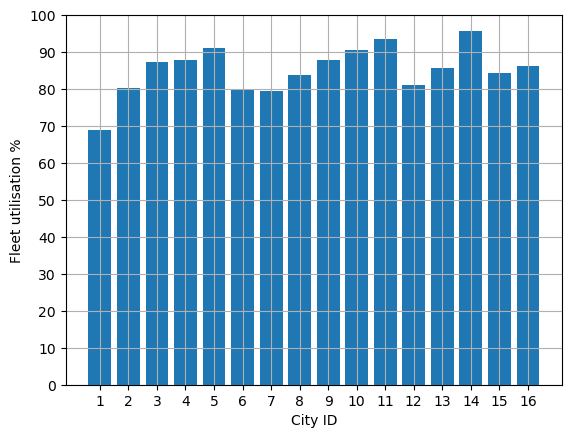

In [12]:
import matplotlib.pyplot as plt
X=D1['City_Id']
Y=D1['Fleet Utilisation (%)'].astype(float)
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('Fleet utilisation %')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()


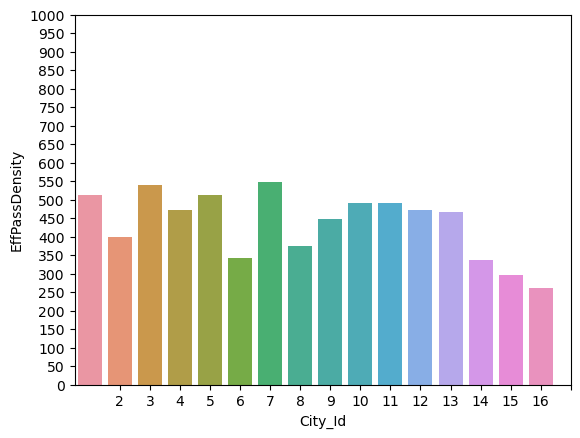

In [13]:
X=D1['City_Id']
Y=D1['EffPassDensity']
sns.barplot(x=X,y=Y,orient='v')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))
plt.show()


## Descriptive Statistic Analysis
Mean of EffectivePassengerDensity = meanEPD

In [14]:
meanEPD=np.mean(D1['EffPassDensity'])
print('Mean of Effective Passenger Density:',meanEPD)

D1['EffPassDensity'].values


Mean of Effective Passenger Density: 435.70925


array([512.67 , 399.396, 541.26 , 473.242, 513.24 , 343.507, 547.648,
       374.139, 446.902, 491.052, 491.81 , 472.813, 467.065, 337.468,
       297.088, 262.048])

In [15]:
std_by_city = D1['EffPassDensity'].std()
variance=std_by_city**2
print('variance:',variance)
print('Standard deviation:',std_by_city)

variance: 7889.694390599999
Standard deviation: 88.82395167183229


In [16]:
#calculate the (X-mean) for each city and it as a column
XdiffMean=D1['EffPassDensity'][:15].values-meanEPD


NewD1={
    'City Id':D1['City_Id'][:15].values,
    'EffPassDensity':D1['EffPassDensity'][:15].values,
    'Mean Variations':XdiffMean
}
NewD1=pd.DataFrame(NewD1)
NewD1

,City Id,EffPassDensity,Mean Variations
0,1,512.670,76.96075
1,2,399.396,-36.31325
2,3,541.260,105.55075
3,4,473.242,37.53275
4,5,513.240,77.53075
5,6,343.507,-92.20225
6,7,547.648,111.93875
7,8,374.139,-61.57025
8,9,446.902,11.19275
9,10,491.052,55.34275


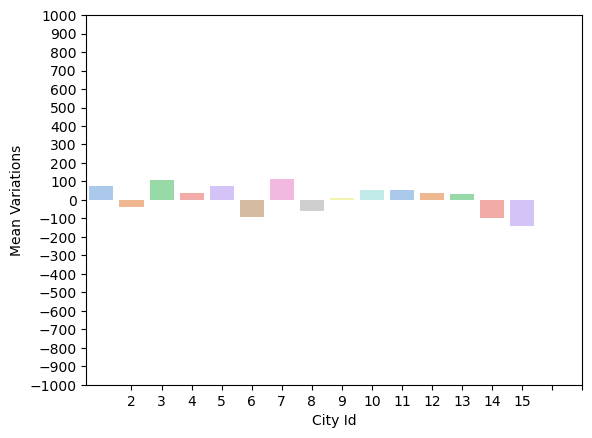

In [17]:
sns.barplot(x=NewD1['City Id'],y=NewD1['Mean Variations'],palette='pastel')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(-1000, 1001, 100))
plt.show()

C:\Users\abhib\AppData\Local\Temp\ipykernel_25528\488825496.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdf_values, shade = True)


<Axes: ylabel='Density'>

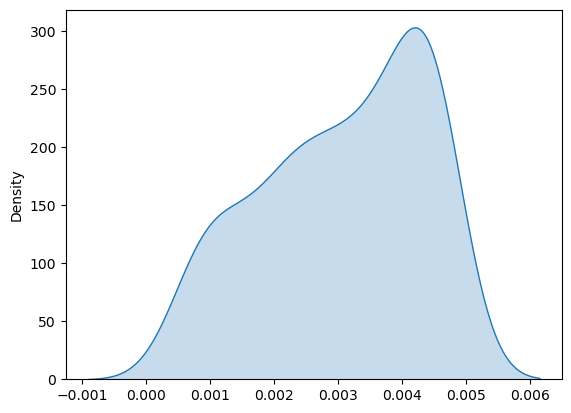

In [18]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['EffPassDensity'])
sd = np.std(D1['EffPassDensity'])
sorted_data = D1['EffPassDensity'].sort_values()
X=np.linspace(D1['EffPassDensity'].min(),D1['EffPassDensity'].max(),100)
pdf_values = norm.pdf(X, dfmean, sd)
sns.kdeplot(pdf_values, shade = True)


In [19]:
'''Stats = D1.describe(include='all')
rows = Stats.index.tolist()
Stats
D1
for i in rows:
    for j in D1.columns:
        value = D1.loc[i, j]
        
        if isinstance(value, str):
            cleaned_value = float(value)  # Remove dots
            try:
                D1.loc[i, j] = float(cleaned_value)
            except ValueError:
                pass  # Handle values that cannot be converted

D1
for i in rows:
    for j in D1.columns:
        print(i,j,type(D1.loc[i,j]))
        print(D1.loc[i,j])'''

"Stats = D1.describe(include='all')\nrows = Stats.index.tolist()\nStats\nD1\nfor i in rows:\n    for j in D1.columns:\n        value = D1.loc[i, j]\n        \n        if isinstance(value, str):\n            cleaned_value = float(value)  # Remove dots\n            try:\n                D1.loc[i, j] = float(cleaned_value)\n            except ValueError:\n                pass  # Handle values that cannot be converted\n\nD1\nfor i in rows:\n    for j in D1.columns:\n        print(i,j,type(D1.loc[i,j]))\n        print(D1.loc[i,j])"

In [20]:

D1
    

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Sl.No.,,,,,,,,
BNG©,589,743,69,5.4,63.9,69.84,1,512.670
RMN,471,498,80.2,7.2,38.99,41.45,2,399.396
TMK,572,620,87.3,5.2,59.89,56.68,3,541.260
KLR,512,539,87.8,3.7,46.71,50.48,4,473.242
CBP,521,564,91,4.1,52.52,56.07,5,513.240
MYS(U),364,431,79.7,4.6,22.49,21.99,6,343.507
MYS(R),617,688,79.6,5.5,66.12,67.33,7,547.648
MDY,416,447,83.7,6.4,39.24,40.88,8,374.139
CJR,463,509,87.8,5.5,46.44,47.27,9,446.902


In [21]:
'''
for j in rows:
    for i in Stats.columns:
        if j == 'mean' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].mean()
        elif j == 'std' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].std()
        elif j == 'min' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].min()
        elif j == 'max' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].max()
        elif j == '25%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.25)
        elif j == '50%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.50)
        elif j == '75%':
            Stats.loc[j, i] = D1[i].quantile(q=0.75)

Stats'''

"\nfor j in rows:\n    for i in Stats.columns:\n        if j == 'mean' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].mean()\n        elif j == 'std' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].std()\n        elif j == 'min' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].min()\n        elif j == 'max' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].max()\n        elif j == '25%' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].quantile(q=0.25)\n        elif j == '50%' and pd.isna(Stats.loc[j, i]):\n            Stats.loc[j, i] = D1[i].quantile(q=0.50)\n        elif j == '75%':\n            Stats.loc[j, i] = D1[i].quantile(q=0.75)\n\nStats"

<class 'numpy.float64'>


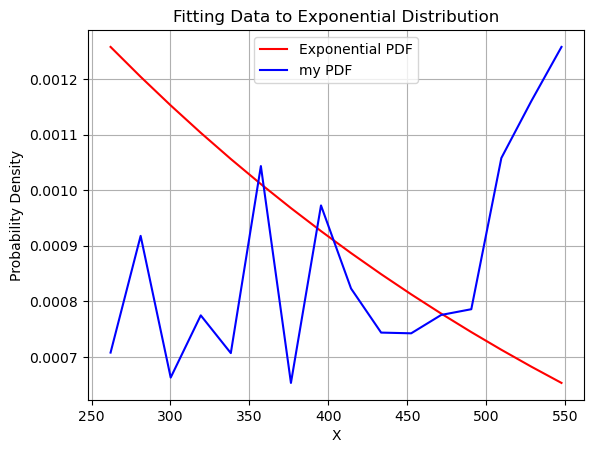

[0.00125778 0.001204   0.00115252 0.00110324 0.00105607 0.00101092
 0.00096769 0.00092632 0.00088671 0.00084879 0.0008125  0.00077776
 0.00074451 0.00071267 0.0006822  0.00065303] [0.00070762 0.00091771 0.00066268 0.00077464 0.00070669 0.00104331
 0.00065303 0.00097248 0.00082291 0.00074361 0.00074232 0.0007754
 0.0007857  0.00105787 0.00116059 0.00125778]


In [22]:
from scipy.stats import expon

# Given data
data = D1['EffPassDensity'][0:16].to_numpy()
# Calculate lambda for the exponential distribution
lambda_param = 1 / data.mean()
print(type(data[0]))
myData=data.astype('float64')


# Generate x values for the plot
x_range = np.linspace(min(data), max(data), 16)
Data=-lambda_param*x_range
myData=-lambda_param*myData
# Calculate the exponential PDF values
pdf_values = np.exp(Data)
myPdf=np.exp(myData)

pdf_values=lambda_param*pdf_values
myPdf=lambda_param*myPdf

# Plot the exponential PDF curve
plt.plot(x_range, pdf_values, color='red', label='Exponential PDF')
plt.plot(x_range, myPdf, color='blue', label='my PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(pdf_values,myPdf)

In [23]:
import statistics as stats
from scipy.stats import norm 
import scipy.stats
Xfactor=D1['EffPassDensity'][:16].values
Yfactor=D1['Effective Kilometers (in lakh)'][:16].values
converted_values = []

for value in Yfactor:
    float_value = float(value)  # Convert string to float
    converted_values.append(float_value)
print(Xfactor.size,Yfactor.size)
R=scipy.stats.pearsonr(Xfactor,converted_values)
print("Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh):",R[0])


16 16
Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh): 0.9053513309902038


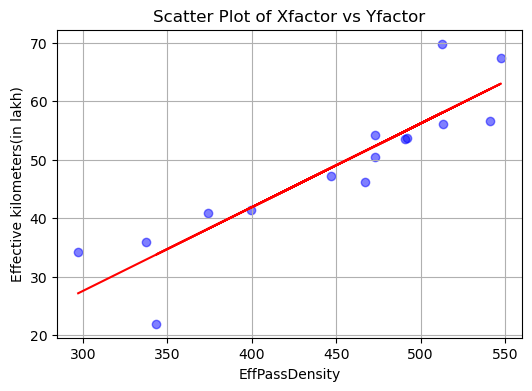

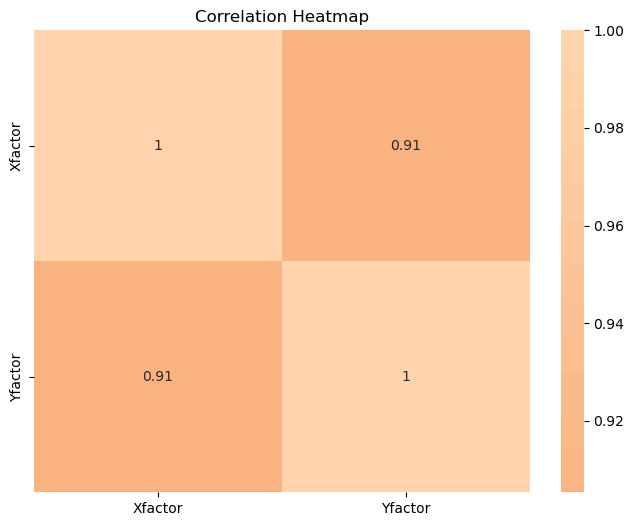

In [24]:
data = {
    'Xfactor': D1['EffPassDensity'][:16].values,
    'Yfactor': D1['Effective Kilometers (in lakh)'][:16].values
}
Df=pd.DataFrame(data)
corrMatrix=Df.corr()
corrMatrix
Df['Xfactor'] = pd.to_numeric(Df['Xfactor'])
Df['Yfactor'] = pd.to_numeric(Df['Yfactor'])

subset_df=Df[:15]
slope, intercept = np.polyfit(subset_df['Xfactor'], subset_df['Yfactor'], 1)
regression_line = slope * subset_df['Xfactor'] + intercept

plt.figure(figsize=(6, 4))
plt.scatter(Df['Xfactor'][:15], Df['Yfactor'][:15], color='blue', alpha=0.5)
plt.plot(subset_df['Xfactor'], regression_line, color='red', label='Regression Line')
plt.xlabel('EffPassDensity')
plt.ylabel('Effective kilometers(in lakh)')
plt.title('Scatter Plot of Xfactor vs Yfactor')
plt.grid(True)

plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True,center=0,linecolor='blue')
plt.title('Correlation Heatmap')
plt.show()
